# **Project: COVID-19 Analyzer on Retrenchment**
```
Aim: Give users better insight of the COVID-19 situation on the retrenchment rate to help them make informed decisions
```


#### From the data gathered, users can use the tool to:
1. Educate themselves on the potential job stability during the pandemic
2. Help them decide what potential jobs they can look for during the pandemic



# 1. Read the dataset
I will first go ahead and read in the COVID-19 dataset

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read COVID-19 dataset
data=pd.read_excel(r"data-2022-10-14T073337.284.xlsx",sheet_name="transformed_data")

The dataset reveals the effects of the global economy on Singapore during the pandemic.

The following columns are:
###### 1. CODE
###### 2. COUNTRY
###### 3. DATE
###### 4. HDI (Human Development Index)
###### 5. TC (Total Cases)
###### 6. TD (Total Deaths)
###### 7. STI (Strigency Index)
###### 8. POP (Population)
###### 9. GDPCAP ($)

In [5]:
# Print column names
print(data.columns)

Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')


# 2. Clean the dataset

Firstly, I would like to filter the country columns by selecting Singapore

In [6]:
# Filter: Only Singapore
data=data[data["COUNTRY"]=="Singapore"]

Next, I would like to convert the data type of the Date column to Date type

In [7]:
# Convert date data type to date format
data["DATE"] = pd.to_datetime(data["DATE"], format = '%Y-%m-%d')

Followed by filling up the missing values with average values

In [8]:
# Replace missing values with mean values
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
40821,SGP,Singapore,2019-12-31,0.932,0.0,0.0,0.000000,15.582011,11.356685
40822,SGP,Singapore,2020-01-01,0.932,0.0,0.0,0.000000,15.582011,11.356685
40823,SGP,Singapore,2020-01-02,0.932,0.0,0.0,2.631169,15.582011,11.356685
40824,SGP,Singapore,2020-01-03,0.932,0.0,0.0,2.631169,15.582011,11.356685
40825,SGP,Singapore,2020-01-04,0.932,0.0,0.0,2.631169,15.582011,11.356685


Finally, I would like to segregate the date to day, month and year in order to merge with the retrenchment dataset later on

In [9]:
# Segregate the date to day, month and year
data["day"] = data["DATE"].dt.day
data["month"] =data["DATE"].dt.month
data["year"] = data["DATE"].dt.year

# 3. Explore the dataset
I am now going to explore the HDI variable in my dataset

### 3.1 HDI (Human Development Index)
It measures the country's average achievement in terms of health, knowledge and standard of living

*Reference :http://hdr.undp.org/en/content/human-development-index-hdi*

```
Aim: Identify if HDI has an impact on Singapore's economy during the pandemic 
```




Results: There is no indication that HDI is being affected by COVID-19 as the rate is normal since there is no variation in the data values

---

Therefore, HDI is not a good variable to use for my retrenchment visualizations later on

(array([14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6]),
 <a list of 11 Text major ticklabel objects>)

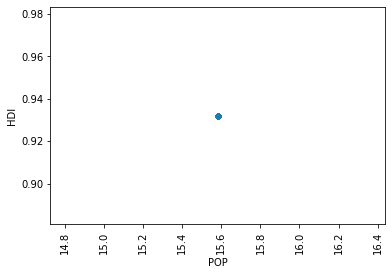

In [10]:
data.plot.scatter(x='POP', y='HDI')
plt.xticks(rotation=90)

Next, I am going to explore the STI variable in my dataset

### 3.2 STI (Strigency Index)
It is a government response tracker that measures the containment policies such as school and workplace closures, stay-at-home policies, etc.

*Reference : https://www.civilsdaily.com/news/what-is-stringency-index/*

```
Assume: Affects the retrenchment rate in Singapore due to the closures which will cause many people to lose their jobs in various industries
```

```
Aim: To see how STI is performing everyday during COVID-19
```

Results: There is a pattern across the whole month (1-30days) for 2 years


---


Therefore, STI seems to be a good variable to use for my retrenchment visualizations later on

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'STI')

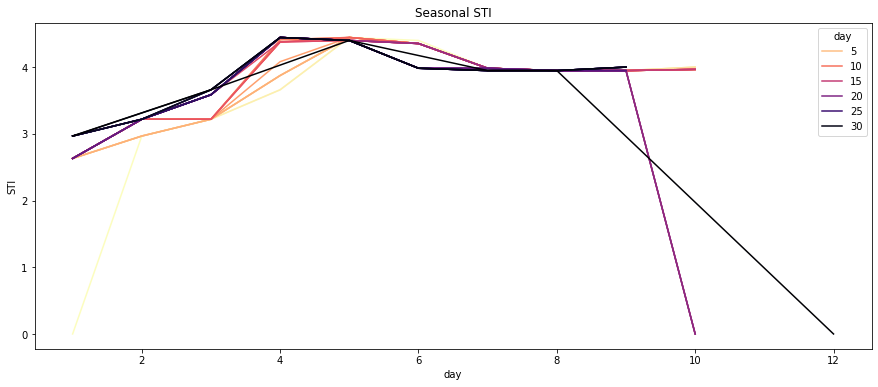

In [11]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data["month"], data["STI"], hue = data["day"], palette = "magma_r")

ax.set_title("Seasonal STI")
ax.set_xlabel("day")
ax.set_ylabel("STI")

(array([14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6]),
 <a list of 11 Text major ticklabel objects>)

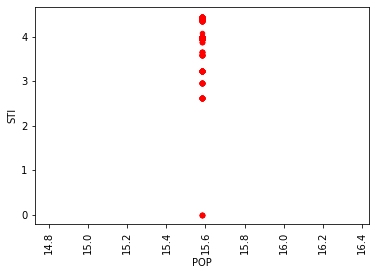

In [12]:
data.plot.scatter(x='POP', y='STI',color="red")
plt.xticks(rotation=90)

I did a distributional plot to have a clearer view of my insights

---

Results: STI seems to be high for the past 2 years where a lot of them falls along 3.8



```
The distributional plot is skewed towards the right which tells me that COVID-19 has an impact on Singapore's STI
```

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributional of STI')

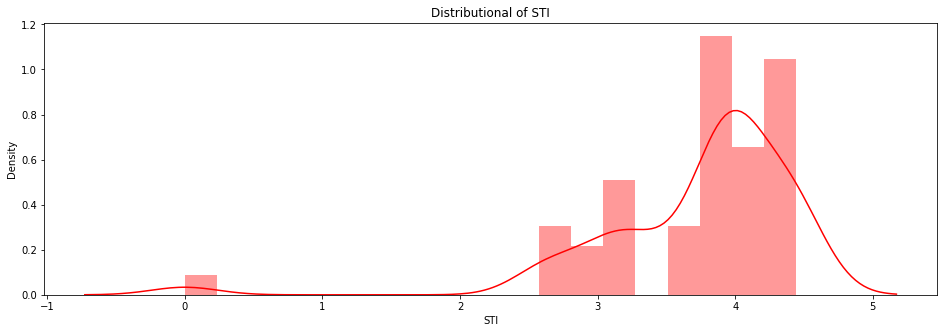

In [13]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(data["STI"], color="red",ax = axes)
plt.title("Distributional of STI")

### 3.3 GDPCAP
It measures the country's economic activity *(↑ GDPCAP = ↓ population)*

Once you do the math, the wealth is spread among fewer people, which raises a country's GDP


*Reference : https://www.thebalance.com/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848*



```
Aim: Tell me how prosperous a country feels to each of its citizens by measuring the country's standard of living through GDPCAP
```


Results: There is no indication that GDPCAP is being affected by COVID-19 as the rate is normal since there is no variation in the data values

---

Therefore, GDPCAP is not a good variable to use for my retrenchment visualizations later on

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'GDPCAP')

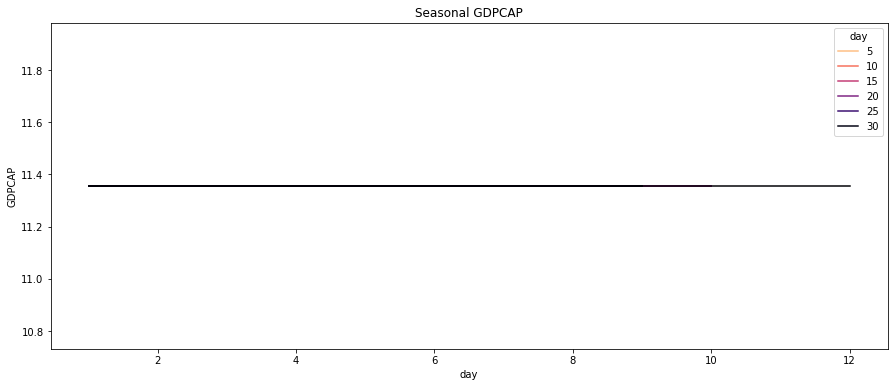

In [14]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data["month"], data["GDPCAP"], hue = data["day"], palette = "magma_r")

ax.set_title("Seasonal GDPCAP")
ax.set_xlabel("day")
ax.set_ylabel("GDPCAP")

(array([14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6]),
 <a list of 11 Text major ticklabel objects>)

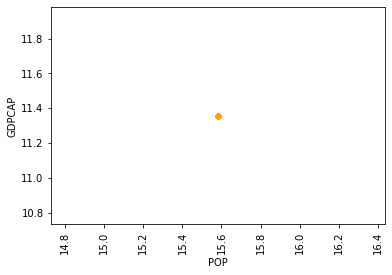

In [15]:
data.plot.scatter(x='POP', y='GDPCAP',color="orange")
plt.xticks(rotation=90)

### 3.4 TC (Total Cases)

```
Assume: Affects the retrenchment rate in Singapore due to the number of COVID-19 cases which will cause many people to WFH 

However, some industries do not have WFH policies where retrenchment will jump into the picture
```

I plotted a time-series plot to view the number of COVID-19 cases in Singapore

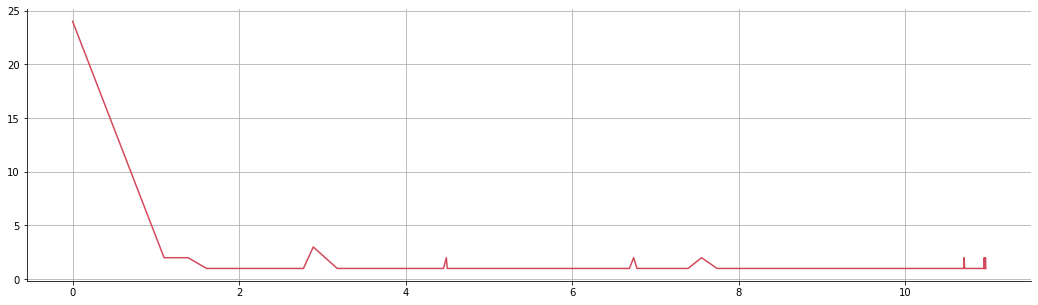

In [17]:
built_TC = data['TC'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(built_TC.index, built_TC, color='#d1495b')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### 3.5 TD (Total Deaths)

```
I do not see any logic between total deaths and retrenchment rate
```

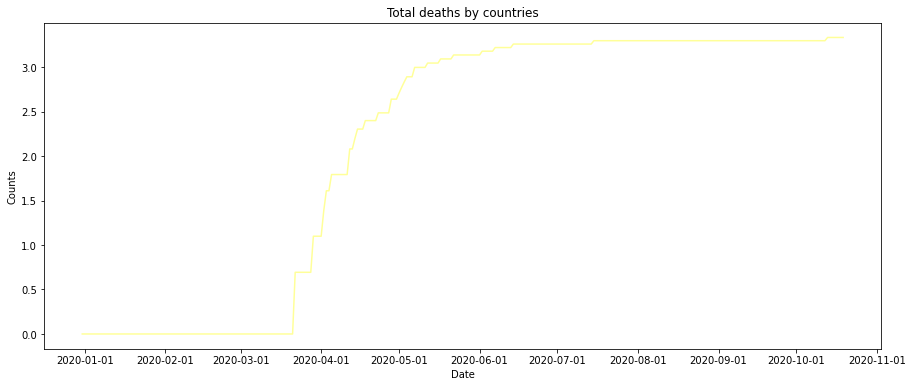

In [20]:
#Inspired by this notebook : https://www.kaggle.com/gergelycsords/impact-of-covid-19-pandemic-some-visualization

import matplotlib.dates as md
fig1, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data=data, x='DATE', y='TD', hue='COUNTRY', legend=False, palette='Accent_r')

ax.set_title("Total deaths by countries")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

#### Inspecting time series and rolling mean
Rolling means (moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends

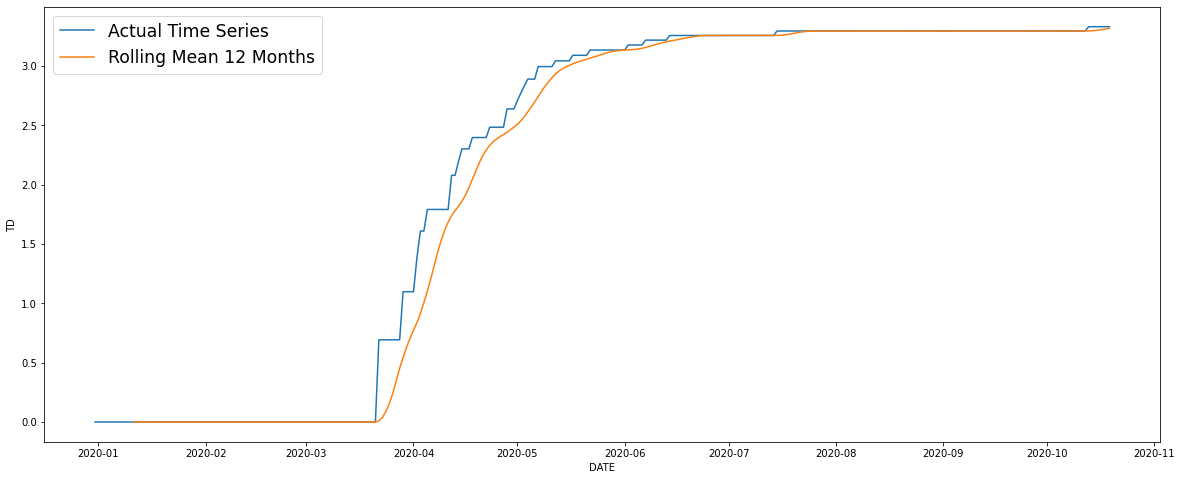

In [25]:
#Inspecting time series and rolling mean: (Take the average of the last 12-months)

crossing1 = data[['DATE', 'TD']].groupby('DATE').sum()
tseries = data.groupby(['DATE'])['TD'].agg(
    ['sum']).reset_index().rename(columns={'sum': 'TD'})

tseries = tseries.set_index('DATE')

fig = plt.subplots(figsize=(20, 8))

g = sns.lineplot(x=tseries.index, y='TD',
                 data=tseries, label="Actual Time Series")

rmean = crossing1.rolling(12, win_type='triang').mean()

g = sns.lineplot(x=rmean.index, y='TD',
                 data=rmean, label="Rolling Mean 12 Months")

plt.legend(fontsize='xx-large')
plt.show()

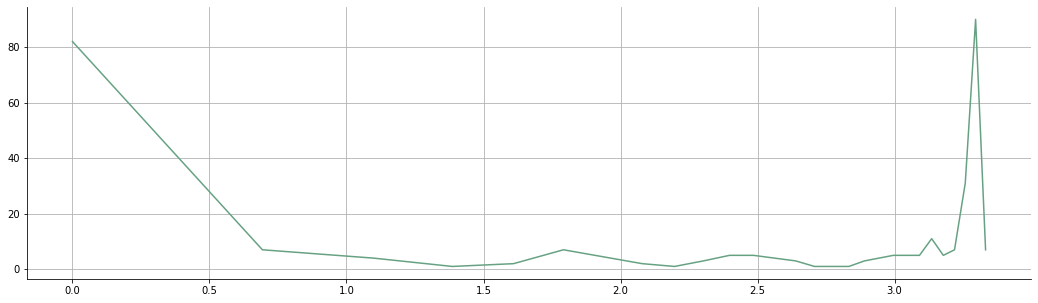

In [26]:
built_TD = data['TD'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(built_TD.index, built_TD, color='#66a182')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

Now, to take a look at my overall COVID-19 dataset for further visualizations

In [27]:
def impact(x):
    y = data[['CODE','COUNTRY','DATE','HDI','TC','TD','STI','POP','GDPCAP']][data["COUNTRY"] == x]
    y = y.sort_values(by="CODE",ascending=False)
    return y.head(15)
impact("Singapore")

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
40821,SGP,Singapore,2019-12-31,0.932,0.000000,0.000000,0.000000,15.582011,11.356685
41005,SGP,Singapore,2020-07-02,0.932,10.694714,3.258097,3.983413,15.582011,11.356685
41021,SGP,Singapore,2020-07-18,0.932,10.767495,3.295837,3.983413,15.582011,11.356685
41020,SGP,Singapore,2020-07-17,0.932,10.760580,3.295837,3.983413,15.582011,11.356685
41019,SGP,Singapore,2020-07-16,0.932,10.755304,3.295837,3.983413,15.582011,11.356685
41018,SGP,Singapore,2020-07-15,0.932,10.749978,3.295837,3.983413,15.582011,11.356685
41017,SGP,Singapore,2020-07-14,0.932,10.742530,3.258097,3.983413,15.582011,11.356685
41016,SGP,Singapore,2020-07-13,0.932,10.735548,3.258097,3.983413,15.582011,11.356685
41015,SGP,Singapore,2020-07-12,0.932,10.731668,3.258097,3.983413,15.582011,11.356685
41014,SGP,Singapore,2020-07-11,0.932,10.727948,3.258097,3.983413,15.582011,11.356685


Results: 
1. Noticed that HDI and GDPCAP are constant
2. Noticed that there is some pattern going on in TD, TC and STI


---
**In this case, I have decided to use `TC` and `STI` as my indicator for my retrenchment visualizations**

Text(0, 0.5, 'Counts')

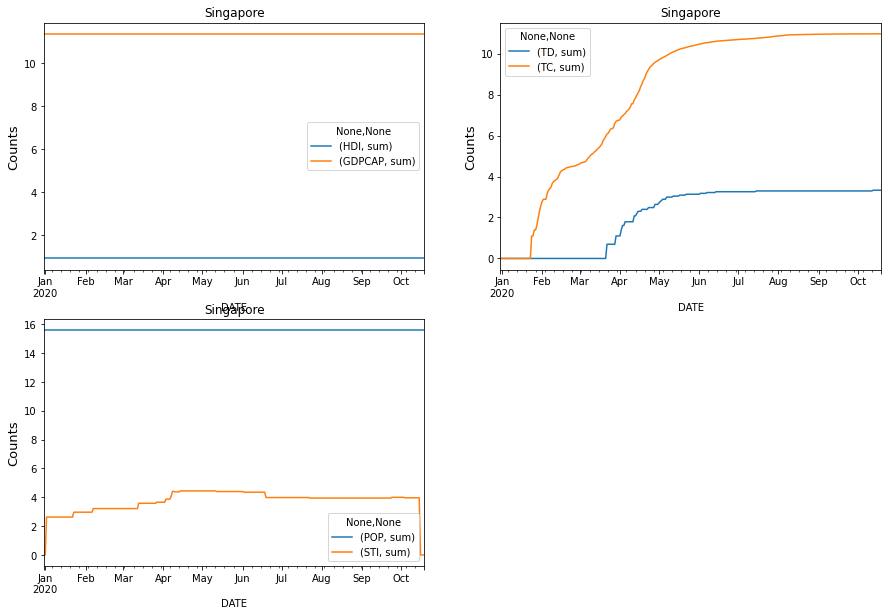

In [28]:
HDI= data[data['COUNTRY']=='Singapore'].groupby(['DATE']).agg({'HDI':['sum']})
GDPCAP = data[data['COUNTRY']=='Singapore'].groupby(['DATE']).agg({'GDPCAP':['sum']})
total1= HDI.join(GDPCAP)

TD= data[data['COUNTRY']=='Singapore'].groupby(['DATE']).agg({'TD':['sum']})
TC = data[data['COUNTRY']=='Singapore'].groupby(['DATE']).agg({'TC':['sum']})
total2= TD.join(TC)

POP= data[data['COUNTRY']=='Singapore'].groupby(['DATE']).agg({'POP':['sum']})
STI = data[data['COUNTRY']=='Singapore'].groupby(['DATE']).agg({'STI':['sum']})
total3= POP.join(STI)

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
total1.plot(ax=plt.gca(), title='Singapore')
plt.ylabel("Counts", size=13)


plt.subplot(2, 2, 2)
total2.plot(ax=plt.gca(), title='Singapore')
plt.ylabel("Counts", size=13)


plt.subplot(2, 2, 3)
total3.plot(ax=plt.gca(), title='Singapore')
plt.ylabel("Counts", size=13)

In [29]:
print(total2)

                  TD         TC
                 sum        sum
DATE                           
2019-12-31  0.000000   0.000000
2020-01-01  0.000000   0.000000
2020-01-02  0.000000   0.000000
2020-01-03  0.000000   0.000000
2020-01-04  0.000000   0.000000
...              ...        ...
2020-10-15  3.332205  10.966283
2020-10-16  3.332205  10.966334
2020-10-17  3.332205  10.966490
2020-10-18  3.332205  10.966542
2020-10-19  3.332205  10.966663

[294 rows x 2 columns]


# 4. Grouping all datasets together

The COVID-19's date column is in day type while the retrenchment dataset is in year type

Thus, due to the mismatched of the granularity data, I have decided to standardize the date type to yearly in order to merge the datasets later on

In [31]:
# Standardize the date data format to yearly
import os
dfyearnumerical=data.groupby(['COUNTRY','year']).agg({'HDI': ['sum'],'TC': ['sum'],'TD': ['sum'],'STI': ['sum'],'POP': ['sum'],'GDPCAP': ['sum']}).reset_index()

# 4. Final Dataset
I will first go ahead and read in the retrenchment dataset

In [33]:
# Read retrenchment dataset
import os
df_industry= pd.read_csv(r"retrench_industry_yearly.csv")

In [34]:
print(dfyearnumerical.head())

     COUNTRY  year      HDI           TC          TD          STI  \
                        sum          sum         sum          sum   
0  Singapore  2019    0.932     0.000000    0.000000     0.000000   
1  Singapore  2020  273.076  2388.895203  628.495042  1096.836651   

           POP       GDPCAP  
           sum          sum  
0    15.582011    11.356685  
1  4565.529179  3327.508824  


Finally, I have merged the COVID-19 dataset and the retrenchment dataset together for deeper visualizations

In [35]:
# Final dataset combined
finalindustry = df_industry.merge(dfyearnumerical, on='year', how='left')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



This is the final dataset containing the merged data

In [36]:
print(finalindustry.head())

   year      industry1                        industry2  \
0  1998  manufacturing      food, beverages and tobacco   
1  1998  manufacturing      textile and wearing apparel   
2  1998  manufacturing    paper products and publishing   
3  1998  manufacturing  petroleum and chemical products   
4  1998  manufacturing      rubber and plastic products   

                         industry3  retrench (COUNTRY, )  (HDI, sum)  \
0      food, beverages and tobacco       230         NaN         NaN   
1      textile and wearing apparel       310         NaN         NaN   
2    paper products and publishing       510         NaN         NaN   
3  petroleum and chemical products       500         NaN         NaN   
4      rubber and plastic products      1100         NaN         NaN   

   (TC, sum)  (TD, sum)  (STI, sum)  (POP, sum)  (GDPCAP, sum)  
0        NaN        NaN         NaN         NaN            NaN  
1        NaN        NaN         NaN         NaN            NaN  
2        NaN     

Followed by filling up the missing values with '0'

In [37]:
# Replace missing values with '0'
finalindustry=finalindustry.fillna(0)

Next, I will be filtering the years to recent 4 years for better visualization

In [38]:
# Print the recent 4 years from 2018 to 2021
finalindustry=finalindustry[finalindustry["year"]>2017]

I decided to plot a bar chart to take a look at the retrenchment rate over the years by industry type


---


Results: 2020 seems to have the highest number of retrenchment rate in various industries over the last 4 years

```
Infer: COVID-19 has caused a huge impact on the retrenchment rate
```



[Text(0, 0, 'food, beverages and tobacco'),
 Text(0, 0, 'paper,rubber,plastic products and printing'),
 Text(0, 0, 'petroleum, chemical and pharmaceutical products'),
 Text(0, 0, 'fabricated metal products, machinery and equipment'),
 Text(0, 0, 'electronic, computer and optical products'),
 Text(0, 0, 'transport equipment'),
 Text(0, 0, 'other manufacturing industries'),
 Text(0, 0, 'construction'),
 Text(0, 0, 'wholesale trade'),
 Text(0, 0, 'retail trade'),
 Text(0, 0, 'land transport and supporting services'),
 Text(0, 0, 'water transport and supporting services'),
 Text(0, 0, 'air transport and supporting services'),
 Text(0, 0, 'other transport and storage services'),
 Text(0, 0, 'accommodation'),
 Text(0, 0, 'food and beverage services'),
 Text(0, 0, 'telecommunications, broadcasting and publishing'),
 Text(0, 0, 'it and other information services'),
 Text(0, 0, 'financial services'),
 Text(0, 0, 'insurance services'),
 Text(0, 0, 'real estate services'),
 Text(0, 0, 'legal, acc

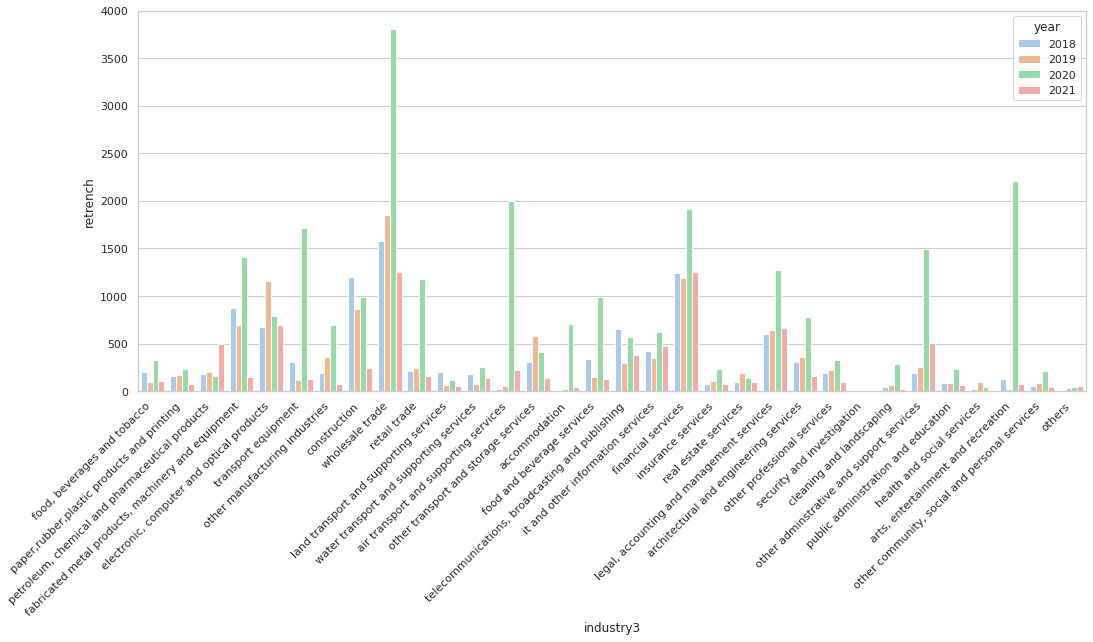

In [41]:
# Bar plot of retrenchment rate over the years by industry type
plt.rcParams['figure.figsize']=(17,7)
sns.set(style="whitegrid")
chart=sns.barplot(data=finalindustry, x="industry3", y="retrench", hue="year", palette="pastel")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Year"),
    yaxis=dict(title_text="Count"),
    barmode="stack",
)

colors = ["#2A66DE", "#FFC32B","#d4c2b6","#b5829b"]
print(finalindustry.industry1.unique())
for r, c in zip(finalindustry.industry1.unique(), colors):
    print(r)
    plot_df = finalindustry[finalindustry.industry1 ==r]
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(
        go.Bar(x=[plot_df.year, plot_df.industry1], y=plot_df['retrench'], name=r, marker_color=c),
    )
    fig.add_trace(
        go.Scatter(x=[plot_df.year, plot_df.industry1], y=plot_df[('TC', 'sum')], name="TC"),
        secondary_y=True,)
    fig.add_trace(
        go.Scatter(x=[plot_df.year, plot_df.industry1], y=plot_df[('STI', 'sum')], name="STI"),
        secondary_y=True,)
    fig.show()

['manufacturing' 'construction' 'services' 'others']
manufacturing


construction


services


others


In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Year"),
    yaxis=dict(title_text="Count"),
    barmode="stack",
)

colors = ["#2A66DE", "#FFC32B","#d4c2b6","#b5829b","#025097","#1c96d2","#fdcc09","#f9a01b","#e81c75","#29c84f","#2bccb0","#bbdfff","#4ca2ee","#ff75b6","#107fb4","#31c9c6","#fcbb30","#eb3f67","#8545d8","#0f9ce2"]
print(finalindustry.industry2.unique())
for r, c in zip(finalindustry.industry2.unique(), colors):
    print(r)
    plot_df = finalindustry[finalindustry.industry2 ==r]
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(
        go.Bar(x=[plot_df.year, plot_df.industry2], y=plot_df['retrench'], name=r, marker_color=c),
    )
    fig.add_trace(
        go.Scatter(x=[plot_df.year, plot_df.industry2], y=plot_df[('TC', 'sum')], name="TC"),
        secondary_y=True,)
    fig.add_trace(
        go.Scatter(x=[plot_df.year, plot_df.industry2], y=plot_df[('STI', 'sum')], name="STI"),
        secondary_y=True,)
    fig.show()

['food, beverages and tobacco'
 'paper,rubber,plastic products and printing'
 'petroleum, chemical and pharmaceutical products'
 'fabricated metal products, machinery and equipment'
 'electronic, computer and optical products' 'transport equipment'
 'other manufacturing industries' 'construction'
 'wholesale and retail trade' 'transportation and storage'
 'accommodation and food services' 'information and communications'
 'financial and insurance services' 'real estate services'
 'professional services' 'administrative and support services'
 'community, social and personal services' 'others']
food, beverages and tobacco


paper,rubber,plastic products and printing


petroleum, chemical and pharmaceutical products


fabricated metal products, machinery and equipment


electronic, computer and optical products


transport equipment


other manufacturing industries


construction


wholesale and retail trade


transportation and storage


accommodation and food services


information and communications


financial and insurance services


real estate services


professional services


administrative and support services


community, social and personal services


others
